In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv")
dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.to_csv("downloaded_data_from_github.csv")

In [8]:
dataset.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

747 are SPAM, 4825 are NOT SPAM

Machine Learning Algorithm do not understand strings, we have to somehow convert the category and message to <b> numbers </b>

In [12]:
dataset['Category'].map({"ham": "0" , "spam": "1"})

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: object

<b>OR</b>

In [14]:
dataset['Category'].apply(lambda x: 1 if x=="spam" else 0)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [15]:
dataset['spam'] = dataset['Category'].apply(lambda x: 1 if x=="spam" else 0)
dataset.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
X = dataset.iloc[:, 1].values
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [26]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

#### How do we not convert the "Message" column to a number ? Ans: COUNT VECTORIZER

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

Bag of words method gives a number to EACH word. Count Vectorizer(more efficient) takes the unique word and then counts the number of the unique words

----

## Explanation of Count Vectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
corpus = [
'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?',
]

corpus

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [18]:
vectorizer = CountVectorizer()

In [19]:
X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [21]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [22]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


The above list is the <b>unique</b> words. If the word "document" appears 10 times in a sentence, we won't create 10 columns, we'll just have 10 assigned to it as a number

----

## Split data into training and testing set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [29]:
X_train

array(['Its going good...no problem..but still need little experience to understand american customer voice...',
       'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901',
       'Ok...', ...,
       "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk",
       'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE',
       'Mm feeling sleepy. today itself i shall get that dear'],
      dtype=object)

In [30]:
X_test

array(['Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It\'s d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@',
       '<Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.',
       "And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed",
       ...,
       'Sorry! U can not unsubscribe yet. THE MOB offer package has a min term of 54 weeks> pls resubmit request after expiry. Reply THEMOB HELP 4 more info',
       "Am I the only one who doesn't stalk profiles?",
       'The whole car appreciated the last two! Dad and are having a map reading semi argument but apart from that things are going ok. P.'],
      dtype=object)

In [31]:
Y_train

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
Y_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

## IMPLEMENTING COUNT VECTORIZER

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)

In [35]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Now we have text of our emails converted into a number matrix

<b>Unique words</b> stored in our array in all our data

In [37]:
print(cv.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07090201529', '07090298926', '07099833605', '0721072', '07734396839', '07742676969', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700621170150p', '08701237397', '08701417012', '08701417012150p', '0870141701216', '087016248', '08701752560', '087018728737', '0870241182716', '08702490080', '0870

## Q: Now which Naive Bayes classifier to choose?

#### Overview

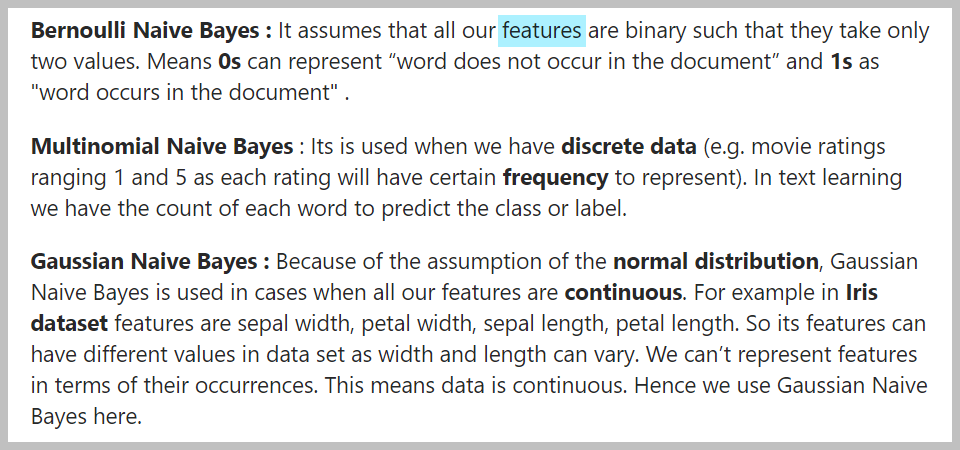

#### Detail

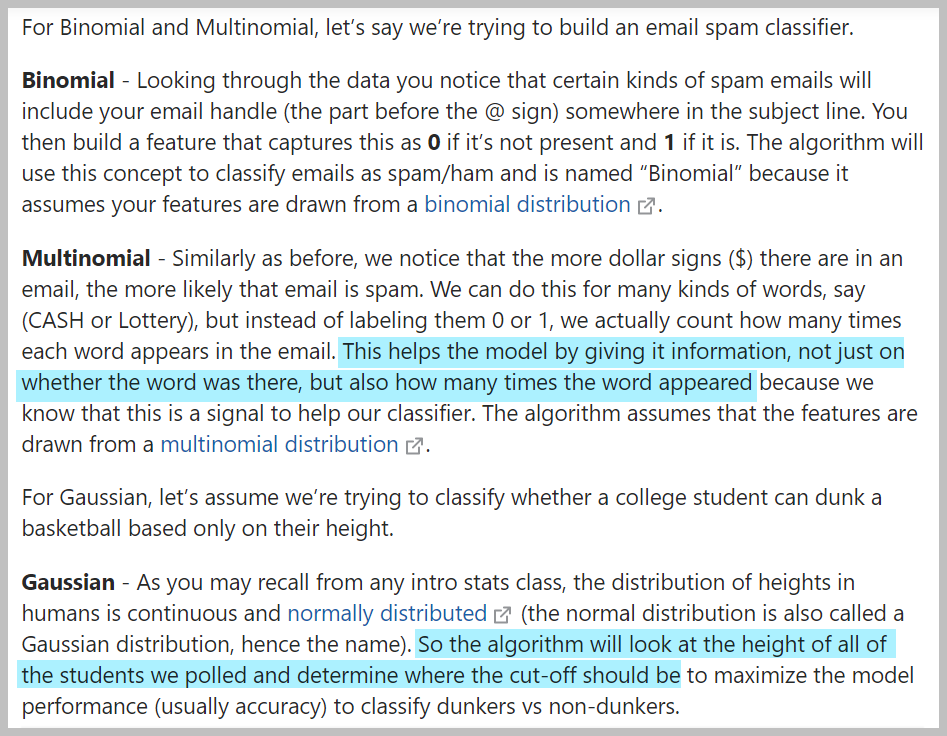

#### We're going to use multi-nomial Naive Bayes for our problem

In [43]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_cv, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## We have the model ready, let's test some emails

In [45]:
email_test = [
    'Hey bro, can we get together to watch a football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you, Dont miss this',
    'Doublt your money in stock market, give me your account number',
    'Would you be available for a date tomorrow?'
]

Step 1 : Transform these into number matrix based on the class we trained before

In [46]:
email_test_cv = cv.transform(email_test)
email_test_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
classifier.predict(email_test_cv)

array([0, 1, 0, 0], dtype=int64)

## Let's test our model on testing data

In [50]:
y_pred = classifier.predict(cv.transform(X_test))
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
print(np.concatenate((y_pred.reshape(-1,1),Y_test.reshape(-1,1)),1)[0:50])

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


## Checking how accurate the model is using confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1206,    2],
       [  15,  170]], dtype=int64)

In [71]:
accuracy_score(Y_test, y_pred)

0.9877961234745154

# AMAZING ACCURACY WOAH

<b>98.7 %</b> Correct Classification

## Second way to check accuracy

In [73]:
classifier.score(cv.transform(X_test), Y_test)

0.9877961234745154